In [1]:
import seaborn as sns
import scipy
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, StratifiedGroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score,balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix,average_precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import ConnectionPatch
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import  roc_curve, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from scipy.stats import mannwhitneyu
import numpy.ma as ma
import statannot
from statannot import add_stat_annotation
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv('data/df.csv',index_col=0)

In [3]:
df['Diagnosis']=df['Diagnosis'].replace('Cancer',1)
df['Diagnosis']=df['Diagnosis'].replace('Normal',0)
df

,Fusobacterium,Bacteroides,Prevotella,Sphingomonas,Blautia,Faecalibacterium,_Eubacterium__coprostanoligenes_group,Akkermansia,Lachnoclostridium,Escherichia-Shigella,...,Gordonibacter,Candidatus_Soleaferrea,GCA-900066755,BMI,Age,Gender_m,Country_CA,Country_FRA,Country_USA,Diagnosis
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR2143719,-1.862648,6.050507,-1.862648,-1.862648,4.327667,3.873924,4.343927,4.427067,-1.862648,0.334576,...,-1.862648,-1.862648,-1.862648,30.0,75,0,0,0,1,1
ERR475521,2.128989,6.617478,4.964827,6.039707,3.543286,7.173350,3.870467,3.770315,4.182252,3.278429,...,-4.157010,-4.157010,-1.266638,24.0,48,0,0,1,0,1
SRR2143930,-2.149559,7.310216,-1.456412,-2.149559,6.497082,7.276296,4.973308,5.458319,3.288520,0.941484,...,-0.357799,-2.149559,-2.149559,23.0,72,0,0,0,1,0
Healthy1-2027,-0.296087,8.108097,0.591216,-2.241997,6.524553,6.356960,4.631167,7.576967,2.869991,-0.162556,...,-2.241997,-2.241997,-2.241997,22.0,65,0,1,0,0,0
SRR2143912,-1.378543,7.510076,-1.378543,-1.378543,6.109191,5.423852,3.570217,5.394538,1.394046,0.567368,...,-1.378543,-1.378543,-1.378543,25.0,51,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR2143836,-1.432782,6.560162,-1.432782,-1.432782,5.653119,4.975746,4.488796,-1.432782,0.358977,-1.432782,...,-1.432782,-1.432782,-1.432782,32.0,71,1,0,0,1,1
SRR2143587,-1.513241,6.161841,-1.513241,-1.513241,6.151106,4.727035,4.750158,5.564257,1.577802,-1.513241,...,-1.513241,-1.513241,-1.513241,21.0,51,0,0,0,1,0
SRR2143926,-2.698334,7.365102,-2.698334,-2.698334,5.873537,5.071467,3.752137,-0.213427,3.763135,0.633871,...,-2.698334,-0.501109,-0.618892,21.0,45,0,0,0,1,0


In [4]:
corr_matrix=df.corr()
corr_matrix["Diagnosis"].sort_values(ascending=False)[1:]

 Porphyromonas                    0.307907
 Peptostreptococcus               0.302226
 Fusobacterium                    0.274606
 Parvimonas                       0.270781
Age                               0.219121
                                    ...   
 _Eubacterium__eligens_group     -0.133295
 Lachnospiraceae_UCG-003         -0.135759
 Anaerostipes                    -0.154025
 Lachnospiraceae_NK4A136_group   -0.156815
 Lachnospira                     -0.180337
Name: Diagnosis, Length: 170, dtype: float64

In [22]:
c.sort_values(ascending=False)[1:].index

Index([' Porphyromonas', ' Peptostreptococcus', ' Fusobacterium',
       ' Parvimonas', 'Age', 'Gender_m', ' Anaerotruncus',
       ' Methanobrevibacter', 'BMI', ' Escherichia-Shigella',
       ...
       ' Corynebacterium', ' Lachnospiraceae_UCG-001',
       ' Defluviitaleaceae_UCG-011', ' _Eubacterium__ventriosum_group',
       ' Erysipelotrichaceae_UCG-003', ' _Eubacterium__eligens_group',
       ' Lachnospiraceae_UCG-003', ' Anaerostipes',
       ' Lachnospiraceae_NK4A136_group', ' Lachnospira'],
      dtype='object', length=170)

In [16]:
corr_matrix["Diagnosis"]

 Fusobacterium    0.274606
 Bacteroides     -0.017462
 Prevotella       0.085824
 Sphingomonas     0.035519
 Blautia         -0.065213
                    ...   
Gender_m          0.192739
Country_CA       -0.006937
Country_FRA       0.018936
Country_USA      -0.016790
Diagnosis         1.000000
Name: Diagnosis, Length: 171, dtype: float64

In [34]:
df_corr=pd.DataFrame(columns=['Correlation'],index=corr_matrix["Diagnosis"].index)
df_corr['Correlation']=corr_matrix["Diagnosis"]#.sort_values(by='Correlation', key=abs)[1:].values
df_corr=df_corr.sort_values(ascending=True,by='Correlation', key=abs)[:-1]
df_corr[-20:]

,Correlation
Defluviitaleaceae_UCG-011,-0.103406
Gemella,0.105992
Hungatella,0.115084
_Eubacterium__ventriosum_group,-0.123716
Erysipelotrichaceae_UCG-003,-0.131602
_Eubacterium__eligens_group,-0.133295
Escherichia-Shigella,0.133866
BMI,0.134208
Lachnospiraceae_UCG-003,-0.135759
Methanobrevibacter,0.135772


In [23]:
df_corr.to_csv('df_corr.csv')

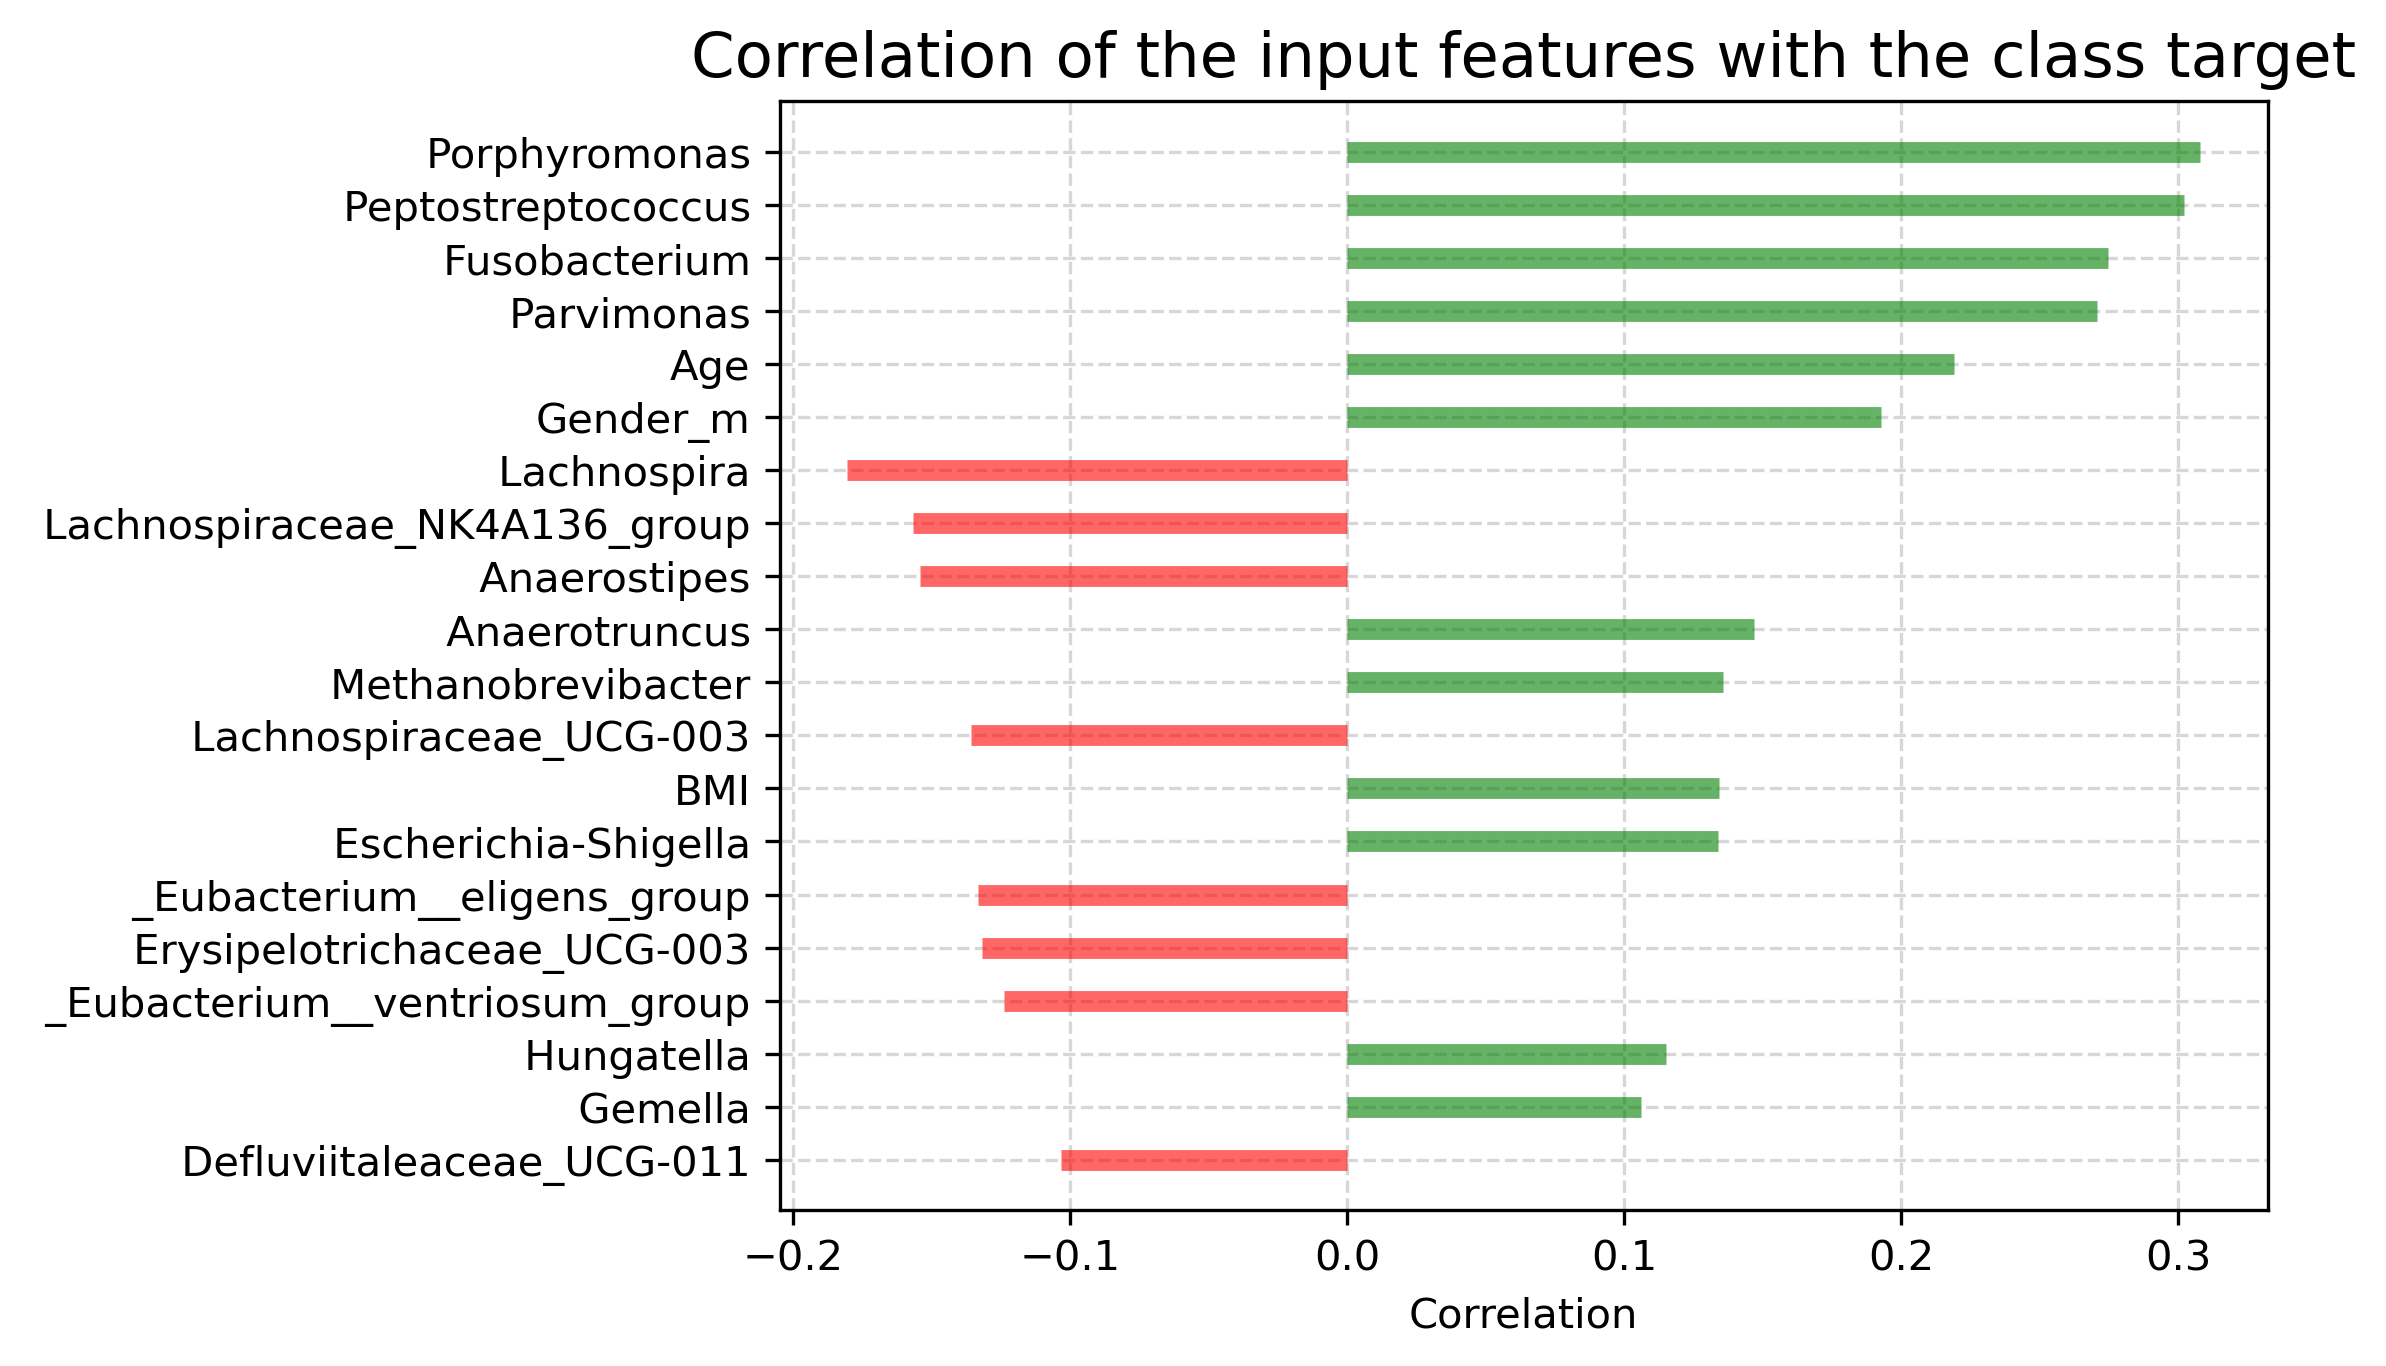

In [37]:
# Draw plot 
plt.figure( dpi=300) 

for i in range(len(df_corr)): 
    # Colour of bar chart is set to red if the sales  
    # is < 60000 and green otherwise 
    df_corr['colors'] = ['red' if float( 
        x) < 0 else 'green' for x in df_corr['Correlation']] 
# Plotting the horizontal lines 
plt.hlines(y=df_corr.index[-20:], xmin=0, xmax=df_corr[-20:].Correlation, 
           color=df_corr[-20:].colors, alpha=0.6, linewidth=5) 
  
# Decorations 
# Setting the labels of x-axis and y-axis 
plt.gca().set(ylabel='', xlabel='Correlation') 
  
# Setting Date to y-axis 
plt.yticks(df_corr[-20:].index, df_corr[-20:].index, fontsize=10) 
  
# Title of Bar Chart 
plt.title('Correlation of the input features with the class target', fontdict={ 
          'size': 15}) 
  
# Optional grid layout 
plt.grid(linestyle='--', alpha=0.5) 
  
# Displaying the Diverging Bar Chart 
plt.show() 

In [38]:
metadata=pd.read_csv('data/metadata.csv',index_col=0)


In [39]:
for i in metadata.index:
    if metadata.loc[i,'Gender'].startswith("f"):
        metadata.at[i,'Gender']='f'
    elif metadata.loc[i,'Gender'].startswith("m"):
        metadata.at[i,'Gender']='m'

In [40]:
for i in metadata.index:
    if metadata.loc[i,'Gender'].startswith("F"):
        metadata.at[i,'Gender']='f'
    elif metadata.loc[i,'Gender'].startswith("M"):
        metadata.at[i,'Gender']='m'

In [41]:
for i in metadata.index:
    if metadata.loc[i,'BMI']=='#¡DIV/0!':
        metadata.at[i,'BMI']=np.nan

In [42]:
metadata['Age']=metadata['Age'].astype(int)
metadata['BMI']=metadata['BMI'].astype(float)

In [43]:
metadata= pd.get_dummies(metadata, columns = ['Gender'],drop_first=True)
metadata['Gender_m']=metadata['Gender_m'].astype(int)

In [44]:
metadata_cancer=metadata.loc[metadata['Diagnosis']=='Cancer']
metadata_normal=metadata.loc[metadata['Diagnosis']=='Normal']


In [45]:
meta=pd.concat([metadata_normal,metadata_cancer]).sample(frac=1,random_state=5)

In [46]:
meta_file=meta[['Diagnosis','Study','Country','Age','BMI','Gender_m']]
meta_file

,Diagnosis,Study,Country,Age,BMI,Gender_m
SampleID,,,,,,
SRR2143719,Cancer,Baxter,USA,75,30.0,0
ERR475521,Cancer,Zeller,FRA,48,24.0,0
SRR2143930,Normal,Baxter,USA,72,23.0,0
Healthy1-2027,Normal,Zackular,CA,65,22.0,0
SRR2143912,Normal,Baxter,USA,51,25.0,1
...,...,...,...,...,...,...
SRR2143836,Cancer,Baxter,USA,71,32.0,1
SRR2143587,Normal,Baxter,USA,51,21.0,0
SRR2143926,Normal,Baxter,USA,45,21.0,0


In [11]:
meta_file.to_csv('data/meta_file.csv')

In [48]:
U1, p = mannwhitneyu(metadata_normal['Age'].values, metadata_cancer['Age'].values)

print(p)

5.613837270449593e-06


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Cancer v.s. Normal: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.614e-06 U_stat=3.001e+04


(<Axes: xlabel='Diagnosis', ylabel='Age'>,
 [<statannot.StatResult.StatResult at 0x2371f50b350>])

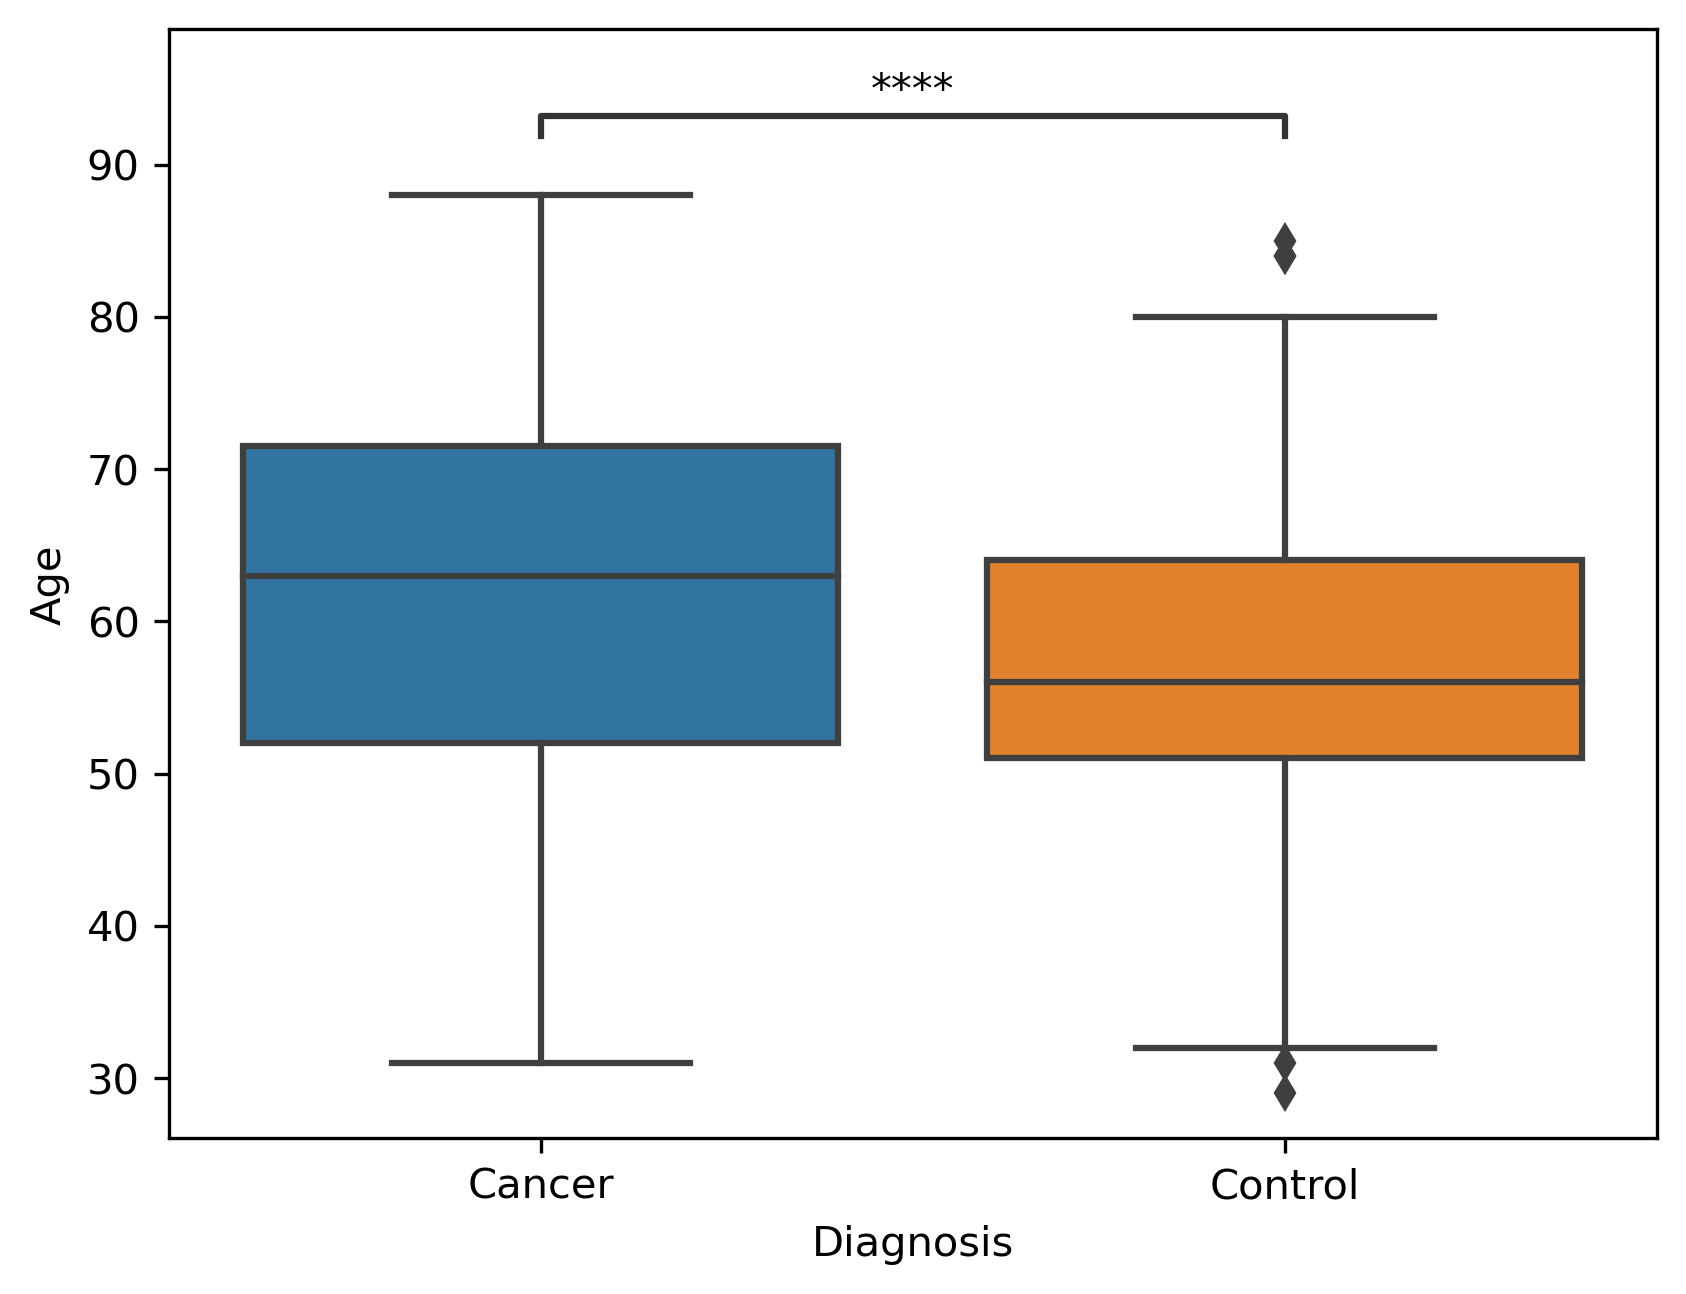

In [49]:
plt.figure(dpi=300)
ax1 =sns.boxplot(meta_file, y='Age', x='Diagnosis')
ax1.set(xticklabels=["Cancer", "Control"])
add_stat_annotation(ax1, data=meta_file, x='Diagnosis', y='Age', #order=order,
                   box_pairs=[("Cancer", "Normal")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

In [50]:
U1, p = mannwhitneyu(metadata_normal['BMI'].dropna().values, metadata_cancer['BMI'].dropna().values)

print(p)

0.002675411283394016


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Cancer v.s. Normal: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.675e-03 U_stat=2.757e+04


(<Axes: xlabel='Diagnosis', ylabel='BMI'>,
 [<statannot.StatResult.StatResult at 0x2371f428c10>])

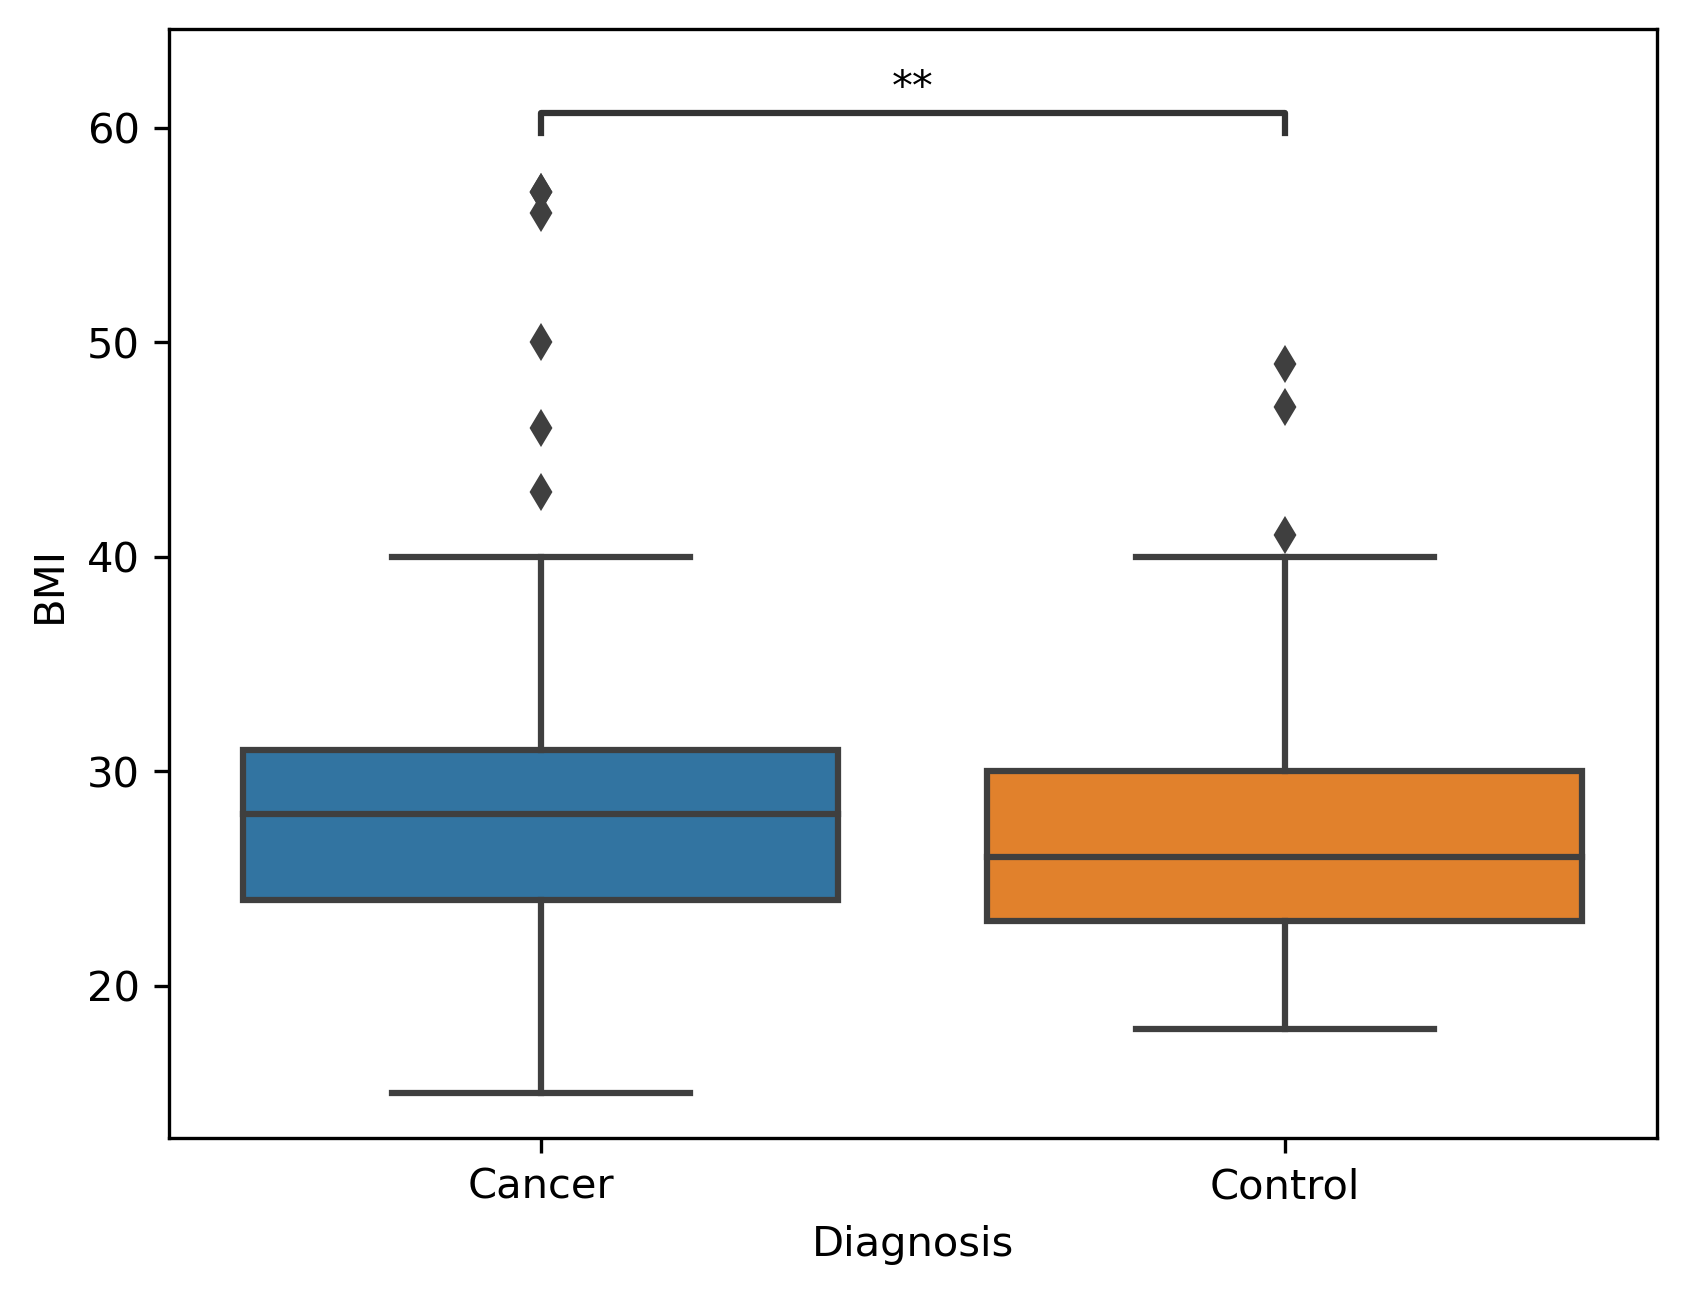

In [51]:
plt.figure(dpi=300)
ax1 =sns.boxplot(meta_file, y='BMI', x='Diagnosis')
ax1.set(xticklabels=["Cancer", "Control"])
add_stat_annotation(ax1, data=meta_file, x='Diagnosis', y='BMI', #order=order,
                   box_pairs=[("Cancer", "Normal")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

In [16]:
np.unique(metadata_normal['Study'],return_counts=True)

(array(['Baxter', 'Zackular', 'Zeller'], dtype=object),
 array([171,  30,  50], dtype=int64))

In [17]:
np.unique(metadata_cancer['Study'],return_counts=True)

(array(['Baxter', 'Zackular', 'Zeller'], dtype=object),
 array([120,  30,  41], dtype=int64))

In [18]:
np.unique(metadata_cancer['Gender_m'],return_counts=True)

(array([0, 1]), array([ 77, 114], dtype=int64))

In [19]:
np.unique(metadata_normal['Gender_m'],return_counts=True)

(array([0, 1]), array([150, 101], dtype=int64))

In [56]:
#gender
table = np.array([[101, 150], [114, 77]])

res= chi2_contingency(table)
res.pvalue

7.619779341125903e-05

In [53]:
np.unique(metadata_cancer['Country'],return_counts=True)

(array(['CA', 'FRA', 'USA'], dtype=object),
 array([  2,  41, 148], dtype=int64))

In [54]:
np.unique(metadata_normal['Country'],return_counts=True)

(array(['CA', 'FRA', 'USA'], dtype=object),
 array([  3,  50, 198], dtype=int64))